In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
df = pd.read_excel('dataset/insurance_data.xlsx')
df.head()

,age,have_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


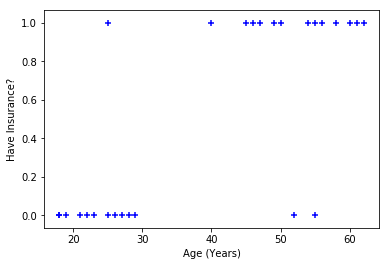

In [25]:
%matplotlib inline
plt.xlabel('Age (Years)', fontsize=10)
plt.ylabel('Have Insurance?', fontsize=10)
plt.scatter(df.age, df.have_insurance, color='blue', marker='+')

In [32]:
# train dataset is 90% and test dataset is 10%, both will choose random data.
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.have_insurance, test_size=0.1)


In [34]:
## creating object for Logistic Regression Model
model = LogisticRegression()
## fit() - training logistic regression model using available data points.
model.fit(X_train, y_train)

C:\Users\h225057\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
X_test

,age
21,26
17,58
9,61


In [37]:
model.predict(X_test)
# less age cust will not likely to buy insurance but aged people will buy.

array([0, 1, 1], dtype=int64)

In [39]:
# Calculate Accuracy of the trained dataset.
accuracy = model.score(X_test, y_test)
print(f"Accurancy: {round(accuracy * 100, 2)} %")

Accurancy: 100.0 %


In [41]:
# probability of data sample being in one class to other.
model.predict_proba(X_test)

array([[0.57961316, 0.42038684],
       [0.21589095, 0.78410905],
       [0.19142116, 0.80857884]])

In [44]:
## Exercice - HR Analytics
df2 = pd.read_excel('dataset/hr_analytics.xlsx')
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [45]:
df2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [48]:
## Data exploration and visualization
left = df2[df2.left==1]
left.shape

(3571, 10)

In [49]:
retained = df2[df2.left==0]
retained.shape

(11428, 10)

In [50]:
# Average numbers of all columns
df2.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


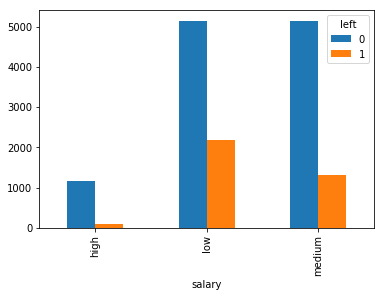

In [51]:
'''
From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm
'''

# Impact of salary on employee retention
pd.crosstab(df2.salary,df2.left).plot(kind='bar')

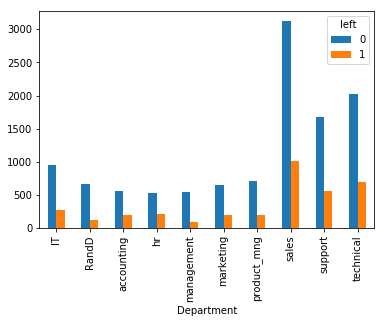

In [52]:
# Department wise employee retention rate
pd.crosstab(df2.Department,df2.left).plot(kind='bar')

In [53]:
subdf = df2[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [54]:
# Tackle salary dummy variable
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [55]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [59]:
X = df_with_dummies
y = df2.left
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [62]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\h225057\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
# Calculate Accuracy of the trained dataset.
accuracy = model.score(X_test, y_test)
print(f"Accurancy: {round(accuracy * 100, 2)} %")

Accurancy: 77.74 %
